# Question 1:
- Learn about zipf's law
- Pick any file or files in NLTK package 
- Prove if zipf's law work in natural language or not 
- Requirements:
    - use glop to open and read file 
    - create at least one function and one lambda function 
    - save your data as csv file content(word, rank, frequency) with TITLE and sort it by rank 
    - open csv file and generate log-log fig according to data you saved 
    - write conclusion at the end based on your figure.

In [1]:
import nltk

In [2]:
from nltk.corpus import gutenberg

In [3]:
import glob

In [23]:
n= gutenberg.fileids()
print(n)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [24]:
path= gutenberg.abspath('shakespeare-caesar.txt')
print(path)

C:\nltk_data\corpora\gutenberg\shakespeare-caesar.txt


In [17]:

filepath = gutenberg.abspath('shakespeare-caesar.txt')
txt = glob.glob(filepath)
for textfile in txt:
  f = open(textfile, 'r') #Maybe you need a os.joinpath here, see Uku Loskit's answer, I don't have a python interpreter at hand
  for line in f:
    print (line),

[The Tragedie of Julius Caesar by William Shakespeare 1599]





Actus Primus. Scoena Prima.



Enter Flauius, Murellus, and certaine Commoners ouer the Stage.



  Flauius. Hence: home you idle Creatures, get you home:

Is this a Holiday? What, know you not

(Being Mechanicall) you ought not walke

Vpon a labouring day, without the signe

Of your Profession? Speake, what Trade art thou?

  Car. Why Sir, a Carpenter



   Mur. Where is thy Leather Apron, and thy Rule?

What dost thou with thy best Apparrell on?

You sir, what Trade are you?

  Cobl. Truely Sir, in respect of a fine Workman, I am

but as you would say, a Cobler



   Mur. But what Trade art thou? Answer me directly



   Cob. A Trade Sir, that I hope I may vse, with a safe

Conscience, which is indeed Sir, a Mender of bad soules



   Fla. What Trade thou knaue? Thou naughty knaue,

what Trade?

  Cobl. Nay I beseech you Sir, be not out with me: yet

if you be out Sir, I can mend you



   Mur. What mean'st thou by that

In [4]:
import string
import re
import operator
import csv
def removePunctuation(unclear):
    filtered_words = [''.join(c for c in s if c not in string.punctuation) for s in unclear]
    filtered_words = [s for s in filtered_words if s]
    return filtered_words

In [5]:
import csv
def csvOperation(sortedList):
    rank=1
    with open('pppp.csv', 'w',newline='') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
        wr.writerow(("Word","Rank","Frequency"))
        for data in sortedList:
            wr.writerow(data)
            rank+=1

In [6]:
import string
import re
import operator
import csv


allnames = gutenberg.fileids()
freq_dist={}
for file in allnames:
    filepath = gutenberg.abspath(file)
    txt = glob.glob(filepath)
    for textfile in txt:
        #print(textfile)
        unclear_words = list(gutenberg.words(textfile))
        filtered = removePunctuation(unclear_words)
        for word in filtered:
            if word in freq_dist:
                freq_dist[word] = freq_dist[word]+1
            else:
                freq_dist[word] = 1
sorted_characters = sorted(freq_dist.items(), key=operator.itemgetter(1), reverse = True) # sorting the dict based on frequency
print('sorted frequency list: \n ',sorted_characters[:10])
new_lst=[]
rank=1
for data in sorted_characters:
    new_lst.append((data[0],rank,data[1]))
    rank+=1
    
csvOperation(new_lst)

sorted frequency list: 
  [('the', 125750), ('and', 78848), ('of', 70080), ('to', 46446), ('a', 32505), ('in', 31959), ('I', 30256), ('that', 27301), ('he', 22203), ('his', 20594)]


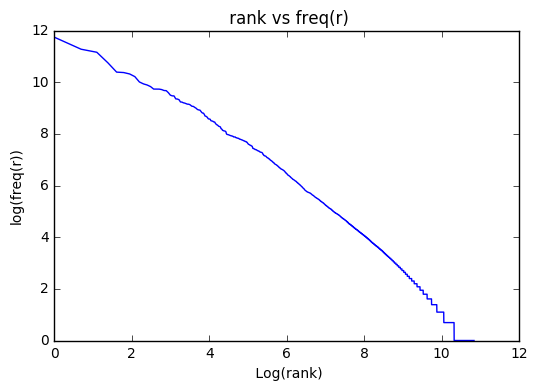

In [8]:
import csv
import matplotlib.pyplot as plt
import math
def plotZipf(fileName):
    #i=0
    freq_list=[]
    rank_list=[]
    with open(fileName, 'r') as csvfile:
        first=True
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            #print(i)
            # i+=1
            if first:
                first=False
                continue

            r_data = float(row[1].strip('""'))
            rank = math.log(r_data)
            #print(type(rank))
            f_data = row[2].strip('""')
            freq = math.log(float(f_data))
            #print(rank," ",freq)
            #plt.scatter(rank,freq)
            rank_list.append(rank)
            freq_list.append(freq)
    plt.plot(rank_list,freq_list)
    plt.xlabel(" Log(rank)")
    plt.ylabel("log(freq(r))")
    plt.title(" rank vs freq(r)")
    plt.show()
            
plotZipf("pppp.csv")

In [71]:
a='"1"'
a=a.strip('""')
print(a)
b=float(a)
#b = map(float,a)
print(b)


1
1.0


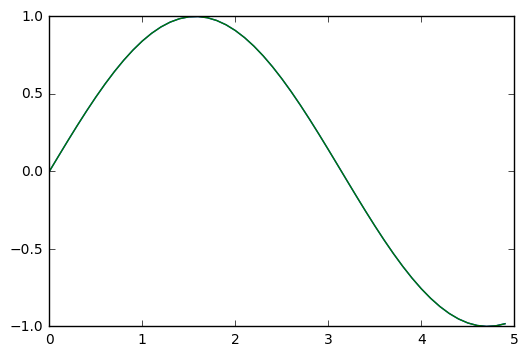

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1);
y = np.sin(x)
plt.plot(x, y)
plt.show()